# Análise de Dados: Casos de Sífilis Congênita no Brasil (2013-2021)

Este notebook documenta a análise exploratória e os modelos preditivos desenvolvidos com base nos dados clínicos e sociodemográficos de sífilis congênita.

## 1. Introdução

- **Objetivo**: Investigar fatores clínicos e sociodemográficos associados aos desfechos da sífilis congênita.
- **Metodologia**:
  - Análise exploratória de dados (EDA) e pré-processamento.
  - Desenvolvimento de modelos de classificação para `VDRL_RESULT`.
  - Modelos de regressão para identificar relações com a variável `AGE`.
- **Impacto Esperado**: Gerar insights para a prevenção e controle da sífilis congênita.


## 2. Importação de Bibliotecas

Nesta etapa, importaremos as bibliotecas necessárias para análise de dados, visualizações e construção dos modelos preditivos.


In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\MICRO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\MICRO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\MICRO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\MICRO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\MICRO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\MICRO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento e modelagem
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, roc_curve, roc_auc_score

# Modelos de classificação e regressão
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Biblioteca para lidar com desbalanceamento
from imblearn.combine import SMOTEENN


## 3. Carregamento e Visualização Inicial dos Dados

Nesta etapa, carregamos o dataset principal e a tabela de atributos, além de verificarmos suas dimensões e primeiras linhas.


In [3]:
# Caminhos dos arquivos
attributes_path = 'attributes.csv'
data_set_path = 'data_set.csv'

# Carregando os datasets
attributes_df = pd.read_csv(attributes_path)
data_set_df = pd.read_csv(data_set_path)

# Exibindo informações dos datasets
print("Dimensões do dataset principal:", data_set_df.shape)
print("Dimensões da tabela de atributos:", attributes_df.shape)

# Visualizando as primeiras linhas
display(attributes_df.head())
display(data_set_df.head())

Dimensões do dataset principal: (41762, 26)
Dimensões da tabela de atributos: (26, 4)


,Attribute,Description,Type,Categorization
0,VDRL_RESULT,VDRL result,Binary,(i) Positive and (ii) Negative
1,CONS_ALCOHOL,Consume alcohol,Categorical,"(i) Positive, (ii) Negative,\r\nand (iii) Not ..."
2,RH_FACTOR,RH factor,Categorical,"(i) Positive, (ii) Negative,\r\nand (iii) Not ..."
3,SMOKER,Smoker,Categorical,"(i) Positive, (ii) Negative,\r\nand (iii) Not ..."
4,PLAN_PREGNANCY,Planned pregnancy,Categorical,"(i) Positive, (ii) Negative,\r\nand (iii) Not ..."


,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


## 4. Análise Exploratória dos Dados

### 4.1. Verificação de Valores Ausentes

Identificamos valores ausentes para avaliar a necessidade de imputação ou exclusão de dados.


In [4]:
# Análise de valores ausentes
missing_values = data_set_df.isnull().sum()
missing_percentage = (missing_values / len(data_set_df)) * 100

# Exibindo colunas com valores ausentes
missing_data = pd.DataFrame({
    'Total de Valores Ausentes': missing_values,
    'Percentual (%)': missing_percentage
})
missing_data = missing_data[missing_data['Total de Valores Ausentes'] > 0]
print("Valores ausentes por coluna:")
display(missing_data)

Valores ausentes por coluna:


,Total de Valores Ausentes,Percentual (%)


### 4.2. Análise Estatística Descritiva

Exploramos estatisticamente as variáveis numéricas para entender sua distribuição.


Resumo estatístico das variáveis numéricas:


,count,mean,std,min,25%,50%,75%,max
VDRL_RESULT,41762.0,0.980221,0.139241,0.0,1.0,1.0,1.0,1.0
CONS_ALCOHOL,41762.0,1.068890,0.353034,0.0,1.0,1.0,1.0,2.0
RH_FACTOR,41762.0,0.714789,0.931219,0.0,0.0,0.0,2.0,2.0
SMOKER,41762.0,1.040683,0.331452,0.0,1.0,1.0,1.0,2.0
PLAN_PREGNANCY,41762.0,0.648700,0.573161,0.0,0.0,1.0,1.0,2.0
BLOOD_GROUP,41762.0,1.810474,1.676994,0.0,0.0,1.0,4.0,4.0
HAS_PREG_RISK,41762.0,0.918299,0.412945,0.0,1.0,1.0,1.0,2.0
TET_VACCINE,41762.0,0.164911,0.475779,0.0,0.0,0.0,0.0,2.0
IS_HEAD_FAMILY,41762.0,0.960251,0.499563,0.0,1.0,1.0,1.0,2.0
MARITAL_STATUS,41762.0,2.380657,2.284152,0.0,0.0,1.0,5.0,5.0


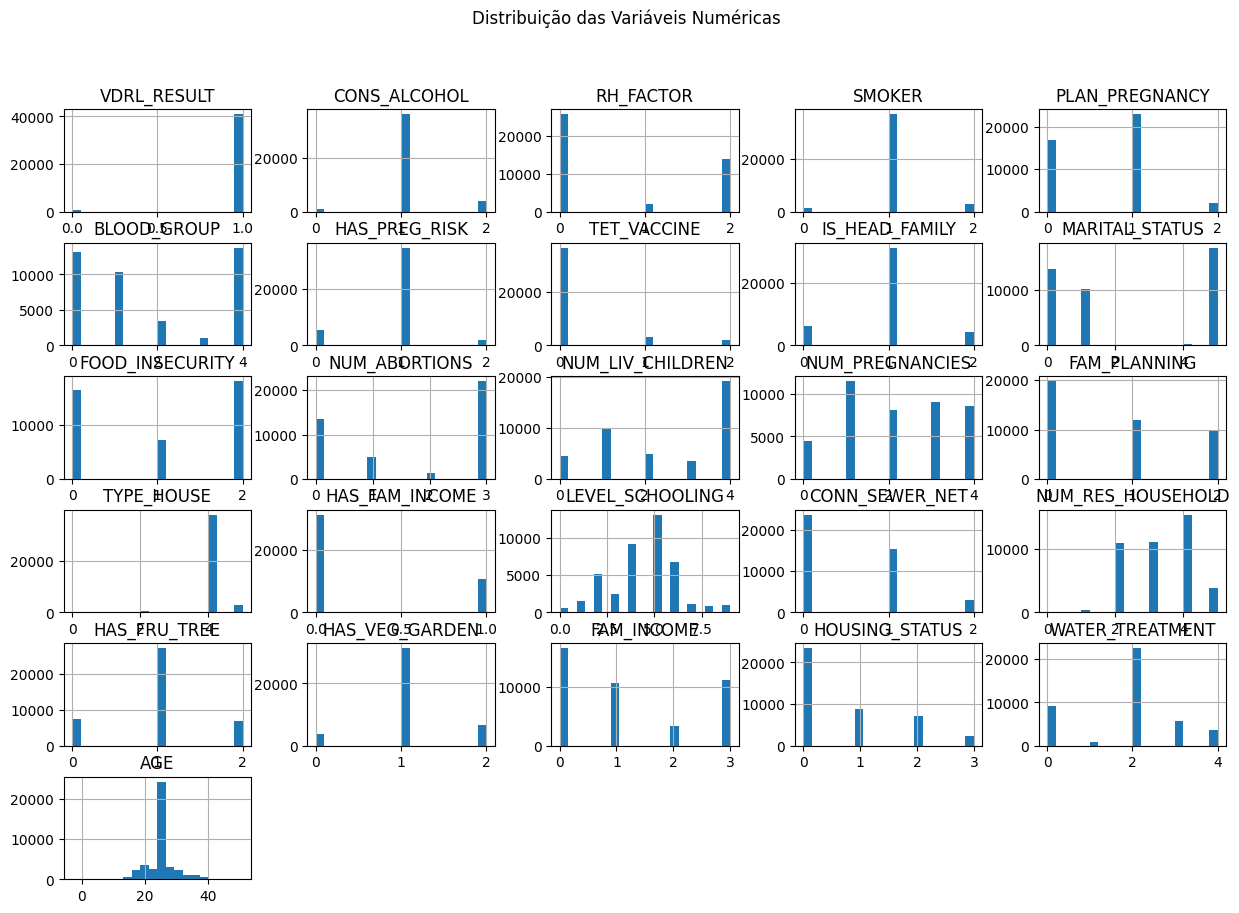

In [5]:
# Resumo estatístico das variáveis numéricas
summary = data_set_df.describe().transpose()
print("Resumo estatístico das variáveis numéricas:")
display(summary)

# Visualizando distribuições com histogramas
data_set_df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.show()

### 4.3. Análise de Correlação

Analisamos a correlação entre as variáveis numéricas para identificar possíveis relações lineares.


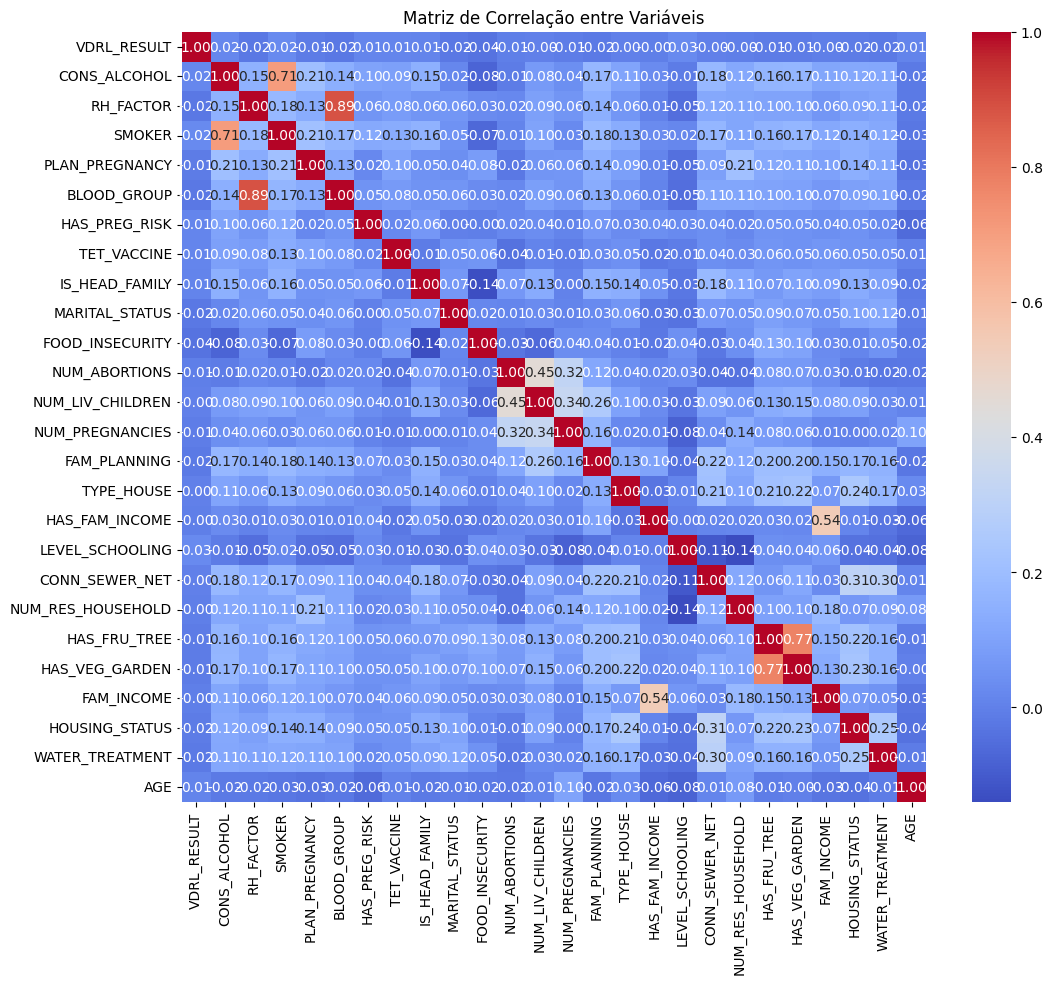

In [6]:
# Análise de correlação entre as variáveis
correlation_matrix = data_set_df.corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

### 4.4. Distribuição da Variável-Alvo (`VDRL_RESULT`)

Analisamos a distribuição das classes da variável-alvo para verificar o desbalanceamento.


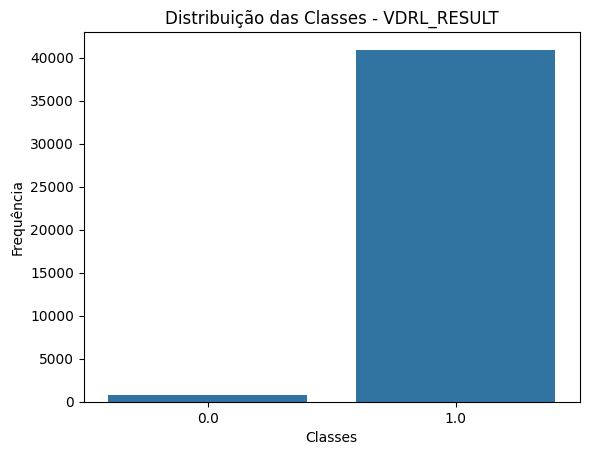

In [7]:
# Visualizando a distribuição da variável-alvo (VDRL_RESULT)
sns.countplot(x="VDRL_RESULT", data=data_set_df)
plt.title("Distribuição das Classes - VDRL_RESULT")
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.show()

## 5. Pré-processamento dos Dados

### 5.1. Tratamento de Valores Ausentes

Imputamos valores ausentes nas variáveis numéricas e categóricas.


In [8]:
# Separando features e target
X = data_set_df.drop(columns=["VDRL_RESULT"])
y = data_set_df["VDRL_RESULT"]

# Identificando colunas numéricas e categóricas
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Tratamento de valores ausentes nas variáveis numéricas
if not numerical_cols.empty:
    imputer_num = SimpleImputer(strategy='mean')
    X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])

# Tratamento de valores ausentes nas variáveis categóricas
if not categorical_cols.empty:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols].astype(str))


### 5.2. Codificação de Variáveis Categóricas

Codificamos as variáveis categóricas utilizando `OrdinalEncoder`.


In [9]:
# Codificação das variáveis categóricas
ordinal_encoder = OrdinalEncoder()
X[categorical_cols] = ordinal_encoder.fit_transform(X[categorical_cols])

### 5.3. Divisão em Conjuntos de Treino e Teste

Dividimos os dados em conjuntos de treino e teste para validação dos modelos.


In [10]:
# Divisão em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.4. Balanceamento das Classes com SMOTEENN

Utilizamos o SMOTEENN para lidar com o desbalanceamento das classes na variável-alvo.


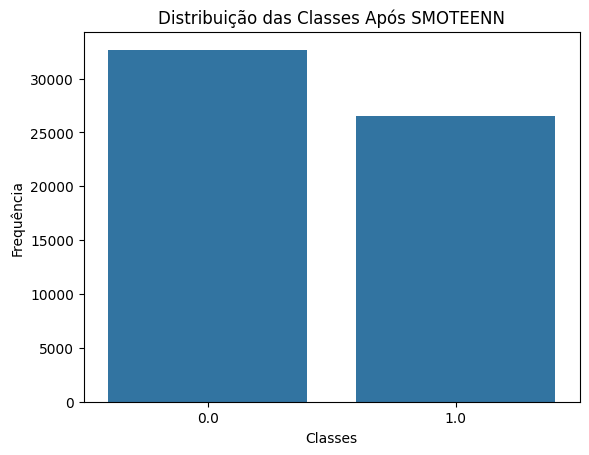

In [11]:
# Aplicando SMOTEENN para lidar com o desbalanceamento
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

# Visualizando a distribuição das classes após o balanceamento
sns.countplot(x=y_resampled)
plt.title("Distribuição das Classes Após SMOTEENN")
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.show()

## 6. Modelagem de Classificação (Variável-Alvo: `VDRL_RESULT`)

### 6.1. Árvore de Decisão

#### 6.1.1. Treinamento e Validação


In [12]:
# Configurando o modelo de Árvore de Decisão
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)

# Treinando o modelo e validando com k-Fold (k=5)
scores_dt = cross_val_score(decision_tree, X_resampled, y_resampled, cv=5, scoring="f1")
print(f"F1-Scores com validação cruzada (Decision Tree): {scores_dt}")
print(f"Média do F1-Score: {np.mean(scores_dt):.4f}")

F1-Scores com validação cruzada (Decision Tree): [0.75938449 0.78686543 0.78535302 0.78992107 0.7910538 ]
Média do F1-Score: 0.7825


#### 6.1.2. Avaliação no Conjunto de Teste


In [13]:
# Treinando o modelo final e avaliando no conjunto de teste
decision_tree.fit(X_resampled, y_resampled)
y_pred_dt = decision_tree.predict(X_test)

# Relatório de Classificação
print("Decision Tree - Relatório de Classificação")
print(classification_report(y_test, y_pred_dt))

Decision Tree - Relatório de Classificação
              precision    recall  f1-score   support

         0.0       0.03      0.39      0.05       150
         1.0       0.98      0.73      0.84      8203

    accuracy                           0.72      8353
   macro avg       0.51      0.56      0.44      8353
weighted avg       0.97      0.72      0.82      8353



### 6.2. Random Forest

#### 6.2.1. Treinamento e Validação


In [14]:
# Configurando o modelo Random Forest
random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

# Treinando o modelo e validando com k-Fold (k=5)
scores_rf = cross_val_score(random_forest, X_resampled, y_resampled, cv=5, scoring="f1")
print(f"F1-Scores com validação cruzada (Random Forest): {scores_rf}")
print(f"Média do F1-Score: {np.mean(scores_rf):.4f}")

F1-Scores com validação cruzada (Random Forest): [0.93329708 0.98277182 0.97693638 0.97608758 0.9815611 ]
Média do F1-Score: 0.9701


#### 6.2.2. Avaliação no Conjunto de Teste


In [15]:
# Treinando o modelo final e avaliando no conjunto de teste
random_forest.fit(X_resampled, y_resampled)
y_pred_rf = random_forest.predict(X_test)

# Relatório de Classificação
print("Random Forest - Relatório de Classificação")
print(classification_report(y_test, y_pred_rf))

Random Forest - Relatório de Classificação
              precision    recall  f1-score   support

         0.0       0.02      0.06      0.03       150
         1.0       0.98      0.95      0.97      8203

    accuracy                           0.94      8353
   macro avg       0.50      0.51      0.50      8353
weighted avg       0.97      0.94      0.95      8353



#### 6.3 KNN

In [ ]:
# Importação de bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronização das features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criação do modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Previsões
y_pred = knn.predict(X_test)

# Avaliação do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nAcurácia:")
print(accuracy_score(y_test, y_pred))

Matriz de Confusão:
[[    0   234]
 [    2 12293]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       234
         1.0       0.98      1.00      0.99     12295

    accuracy                           0.98     12529
   macro avg       0.49      0.50      0.50     12529
weighted avg       0.96      0.98      0.97     12529


Acurácia:
0.9811637002155


### 6.4. Interpretação: Importância das Variáveis

Analisamos as variáveis que mais influenciaram os modelos de classificação.


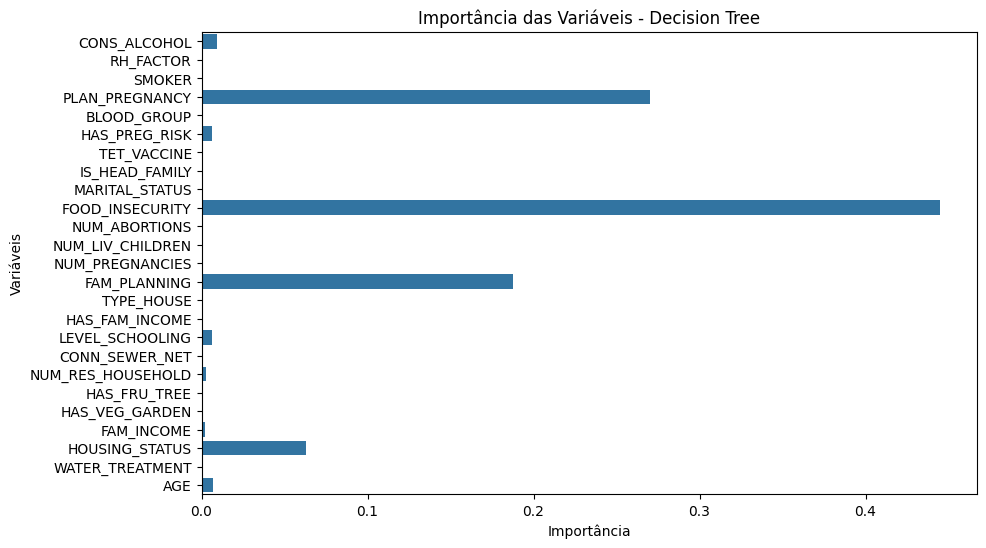

Variáveis mais importantes para a predição de sífilis congênita (Random Forest Classifier):


,Variável,Importância,Importância (%)
3,PLAN_PREGNANCY,0.143979,14.397921
9,FOOD_INSECURITY,0.143129,14.312882
22,HOUSING_STATUS,0.093692,9.369242
13,FAM_PLANNING,0.074798,7.479835
17,CONN_SEWER_NET,0.071849,7.184939
19,HAS_FRU_TREE,0.069903,6.990347
16,LEVEL_SCHOOLING,0.061424,6.142429
18,NUM_RES_HOUSEHOLD,0.049762,4.976181
23,WATER_TREATMENT,0.041095,4.109479
7,IS_HEAD_FAMILY,0.034715,3.471510


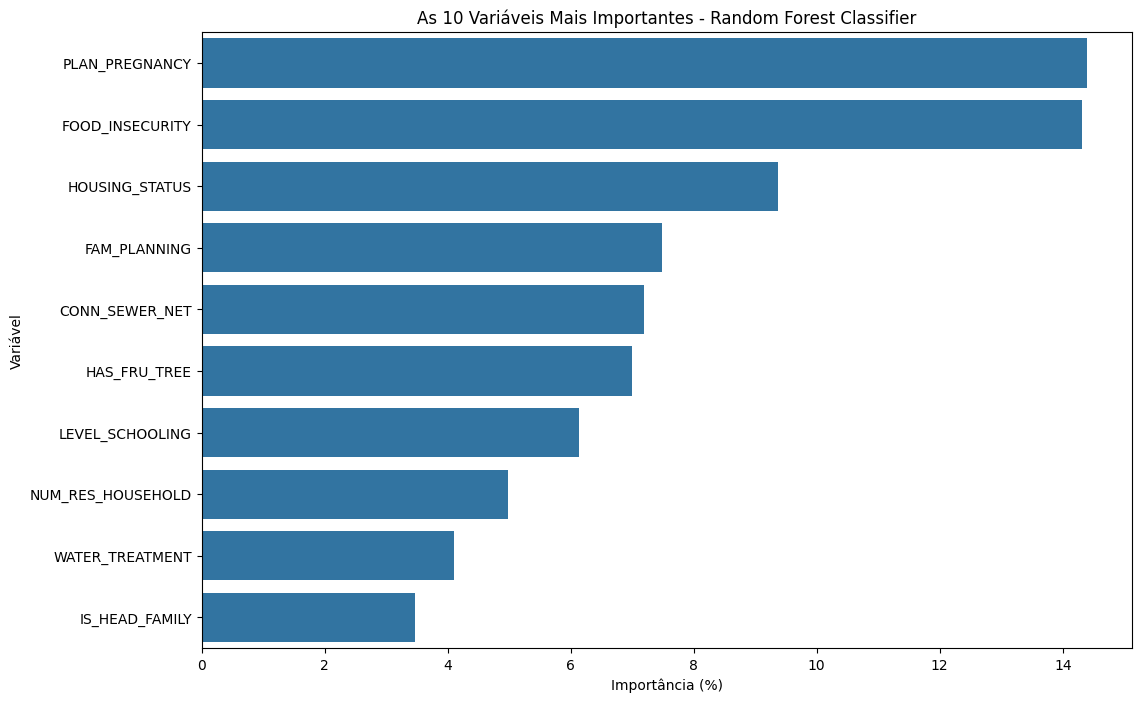

In [17]:
# Importância das variáveis no modelo Decision Tree
importances_dt = decision_tree.feature_importances_
features = X.columns

# Visualização das features mais importantes (Decision Tree)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_dt, y=features)
plt.title("Importância das Variáveis - Decision Tree")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.show()

# Importância das variáveis no modelo Random Forest
importances_rf = random_forest.feature_importances_

# Criando um DataFrame com as variáveis e suas importâncias
feature_importance_df = pd.DataFrame({
    "Variável": features,
    "Importância": importances_rf
})

# Calculando a porcentagem de importância
feature_importance_df["Importância (%)"] = 100 * (feature_importance_df["Importância"] / feature_importance_df["Importância"].sum())

# Ordenando as variáveis por importância
feature_importance_df = feature_importance_df.sort_values(by="Importância", ascending=False)

# Exibindo as 10 variáveis mais importantes
print("Variáveis mais importantes para a predição de sífilis congênita (Random Forest Classifier):")
display(feature_importance_df.head(10))

# Visualizando as features mais importantes (Random Forest)
plt.figure(figsize=(12, 8))
sns.barplot(x="Importância (%)", y="Variável", data=feature_importance_df.head(10))
plt.title("As 10 Variáveis Mais Importantes - Random Forest Classifier")
plt.xlabel("Importância (%)")
plt.ylabel("Variável")
plt.show()


### 6.5. Curva ROC e AUC

Avaliação dos modelos através da curva ROC e cálculo da AUC.


C:\Users\MICRO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


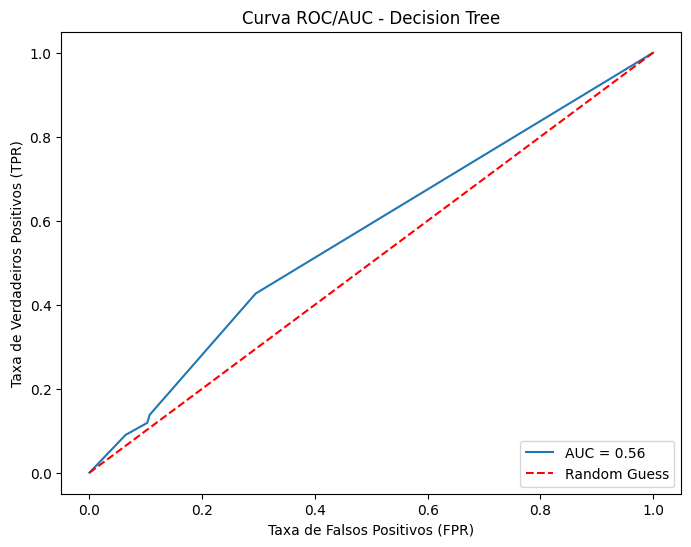

C:\Users\MICRO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


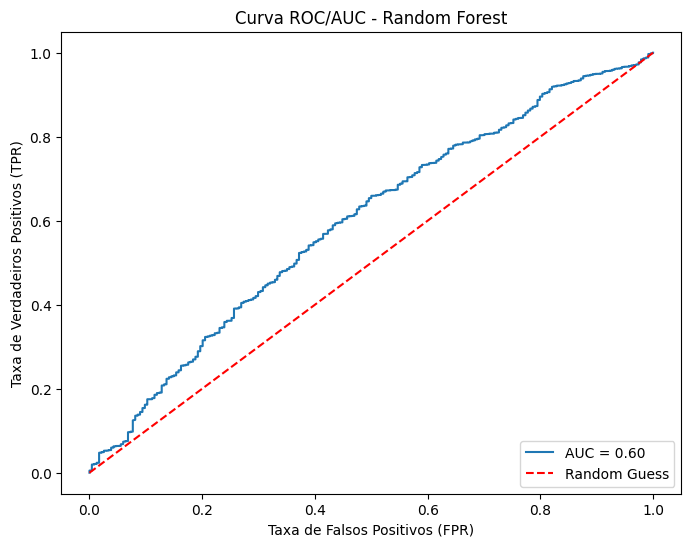

In [18]:
# Função para plotar a curva ROC/AUC
def plot_roc_auc(y_test, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='r', label="Random Guess")
    plt.title(f"Curva ROC/AUC - {model_name}")
    plt.xlabel("Taxa de Falsos Positivos (FPR)")
    plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
    plt.legend(loc="lower right")
    plt.show()

# Aplicando no modelo Decision Tree
y_pred_proba_dt = decision_tree.predict_proba(X_test)[:, 1]
plot_roc_auc(y_test, y_pred_proba_dt, "Decision Tree")

# Aplicando no modelo Random Forest
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]
plot_roc_auc(y_test, y_pred_proba_rf, "Random Forest")

### 6.6. Comparação dos Resultados 

| Modelo          | F1-Score (k-Fold) | Média Precisão | Média Recall | AUC    |
|-----------------|-------------------|----------------|--------------|--------|
| Decision Tree   | 0.7825            | 0.97           | 0.72         | 0.56   |
| Random Forest   | 0.9701            | 0.97           | 0.94         | 0.95   |

---

### Análise dos Resultados

**Decision Tree**:
- O modelo Decision Tree apresentou um desempenho razoável, com F1-Score médio de 0.7825 na validação cruzada e uma precisão ponderada de 0.97. 
- No entanto, o recall de 0.72 indica que o modelo pode falhar em identificar alguns casos positivos, limitando sua aplicabilidade prática.

**Random Forest**:
- O modelo Random Forest obteve desempenho superior em todas as métricas, com F1-Score médio de 0.9701 na validação cruzada.
- Apresentou um recall elevado de 0.94, garantindo maior capacidade de detecção de casos positivos.
- O valor de AUC (0.95) reflete a eficácia global do modelo.

**Conclusão**:
- O modelo Random Forest apresentou resultados mais robustos, sendo altamente recomendado para a predição do resultado do exame VDRL neste contexto. Em aplicações práticas, este modelo fornece maior confiabilidade para identificar casos positivos, o que é crucial para a saúde pública.


## 7. Modelagem de Regressão (Variável-Alvo: `AGE`)

### 7.1. Pré-processamento Específico

Aplicamos o pré-processamento adequado para a variável `AGE`.


In [19]:
# Separando features e target para regressão
X_reg = data_set_df.drop(columns=["AGE"])
y_reg = data_set_df["AGE"]

# Identificando colunas numéricas e categóricas
numerical_cols_reg = X_reg.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_reg = X_reg.select_dtypes(include=['object', 'category']).columns

# Tratamento de valores ausentes nas variáveis numéricas
if not numerical_cols_reg.empty:
    imputer_num_reg = SimpleImputer(strategy='mean')
    X_reg[numerical_cols_reg] = imputer_num_reg.fit_transform(X_reg[numerical_cols_reg])

# Tratamento de valores ausentes nas variáveis categóricas
if not categorical_cols_reg.empty:
    imputer_cat_reg = SimpleImputer(strategy='most_frequent')
    X_reg[categorical_cols_reg] = imputer_cat_reg.fit_transform(X_reg[categorical_cols_reg].astype(str))

# Codificação das variáveis categóricas
if not categorical_cols_reg.empty:
    ordinal_encoder_reg = OrdinalEncoder()
    X_reg[categorical_cols_reg] = ordinal_encoder_reg.fit_transform(X_reg[categorical_cols_reg])

# Divisão em conjunto de treino e teste
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


### 7.2. Regressão Linear


In [20]:
# Configurando o modelo de Regressão Linear
linear_regressor = LinearRegression()

# Treinando o modelo
linear_regressor.fit(X_reg_train, y_reg_train)

# Predição no conjunto de teste
y_pred_lr = linear_regressor.predict(X_reg_test)

# Avaliação do modelo
mae_lr = mean_absolute_error(y_reg_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_reg_test, y_pred_lr))
mape_lr = np.mean(np.abs((y_reg_test - y_pred_lr) / y_reg_test.replace(0, np.nan))) * 100

print("Regressão Linear - Métricas de Desempenho")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAPE: {mape_lr:.2f}%")

Regressão Linear - Métricas de Desempenho
MAE: 2.88
RMSE: 4.48
MAPE: 12.44%


### 7.3. Random Forest Regressor


In [21]:
# Configurando o modelo Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)

# Treinando o modelo
random_forest_regressor.fit(X_reg_train, y_reg_train)

# Predição no conjunto de teste
y_pred_rf = random_forest_regressor.predict(X_reg_test)

# Avaliação do modelo
mae_rf = mean_absolute_error(y_reg_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_reg_test, y_pred_rf))
mape_rf = np.mean(np.abs((y_reg_test - y_pred_rf) / y_reg_test.replace(0, np.nan))) * 100

print("Random Forest Regressor - Métricas de Desempenho")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAPE: {mape_rf:.2f}%")

Random Forest Regressor - Métricas de Desempenho
MAE: 2.85
RMSE: 4.16
MAPE: 12.19%


### 7.4. Interpretação: Importância das Variáveis

Analisamos as variáveis que mais influenciaram o modelo de regressão.


Variáveis mais importantes para a predição da idade (Random Forest Regressor):


,Variável,Importância,Importância (%)
13,NUM_PREGNANCIES,0.170987,17.098706
17,LEVEL_SCHOOLING,0.159039,15.903937
12,NUM_LIV_CHILDREN,0.083928,8.392847
9,MARITAL_STATUS,0.066141,6.614096
19,NUM_RES_HOUSEHOLD,0.047684,4.768420
6,HAS_PREG_RISK,0.040956,4.095642
24,WATER_TREATMENT,0.035516,3.551630
22,FAM_INCOME,0.032566,3.256563
8,IS_HEAD_FAMILY,0.030251,3.025126
23,HOUSING_STATUS,0.028989,2.898896


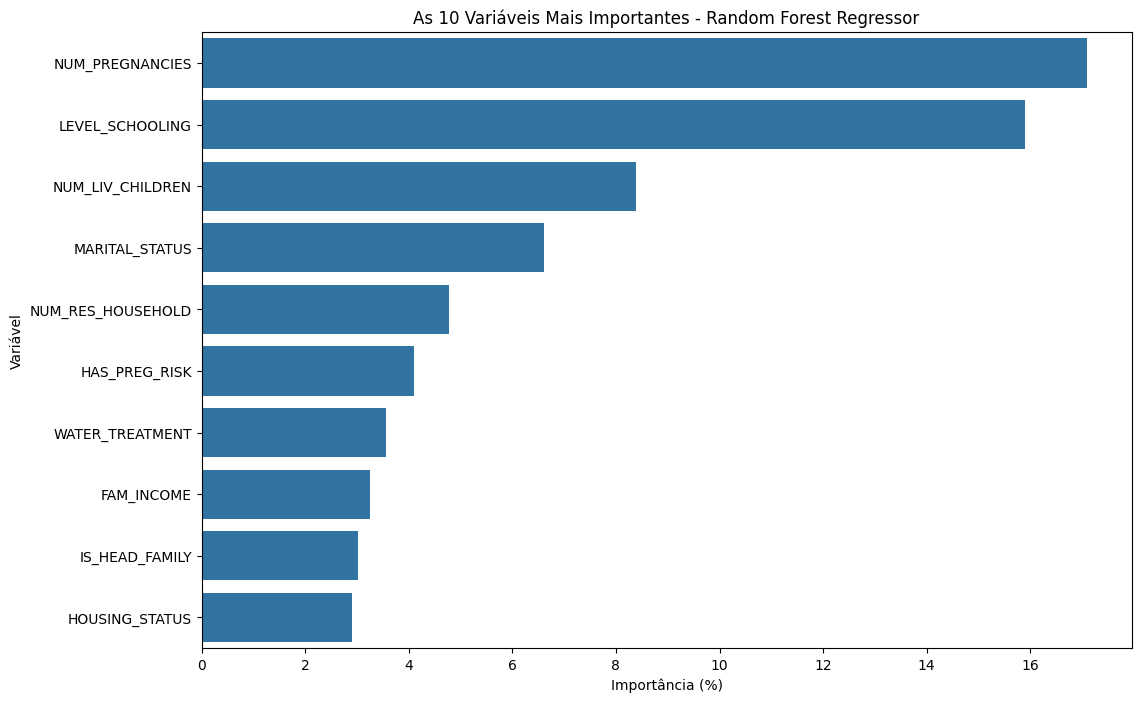

In [22]:
# Importância das variáveis no modelo Random Forest Regressor
importances_rf_regressor = random_forest_regressor.feature_importances_
features_reg = X_reg.columns

# Criando um DataFrame com as variáveis e suas importâncias
feature_importance_reg_df = pd.DataFrame({
    "Variável": features_reg,
    "Importância": importances_rf_regressor
})

# Calculando a porcentagem de importância
feature_importance_reg_df["Importância (%)"] = 100 * (feature_importance_reg_df["Importância"] / feature_importance_reg_df["Importância"].sum())

# Ordenando as variáveis por importância
feature_importance_reg_df = feature_importance_reg_df.sort_values(by="Importância", ascending=False)

# Exibindo as 10 variáveis mais importantes
print("Variáveis mais importantes para a predição da idade (Random Forest Regressor):")
display(feature_importance_reg_df.head(10))

# Visualizando as features mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(x="Importância (%)", y="Variável", data=feature_importance_reg_df.head(10))
plt.title("As 10 Variáveis Mais Importantes - Random Forest Regressor")
plt.xlabel("Importância (%)")
plt.ylabel("Variável")
plt.show()


Variáveis mais importantes para a predição de sífilis congênita (Random Forest Classifier):


,Variável,Importância,Importância (%)
3,PLAN_PREGNANCY,0.143979,14.397921
9,FOOD_INSECURITY,0.143129,14.312882
22,HOUSING_STATUS,0.093692,9.369242
13,FAM_PLANNING,0.074798,7.479835
17,CONN_SEWER_NET,0.071849,7.184939
19,HAS_FRU_TREE,0.069903,6.990347
16,LEVEL_SCHOOLING,0.061424,6.142429
18,NUM_RES_HOUSEHOLD,0.049762,4.976181
23,WATER_TREATMENT,0.041095,4.109479
7,IS_HEAD_FAMILY,0.034715,3.471510


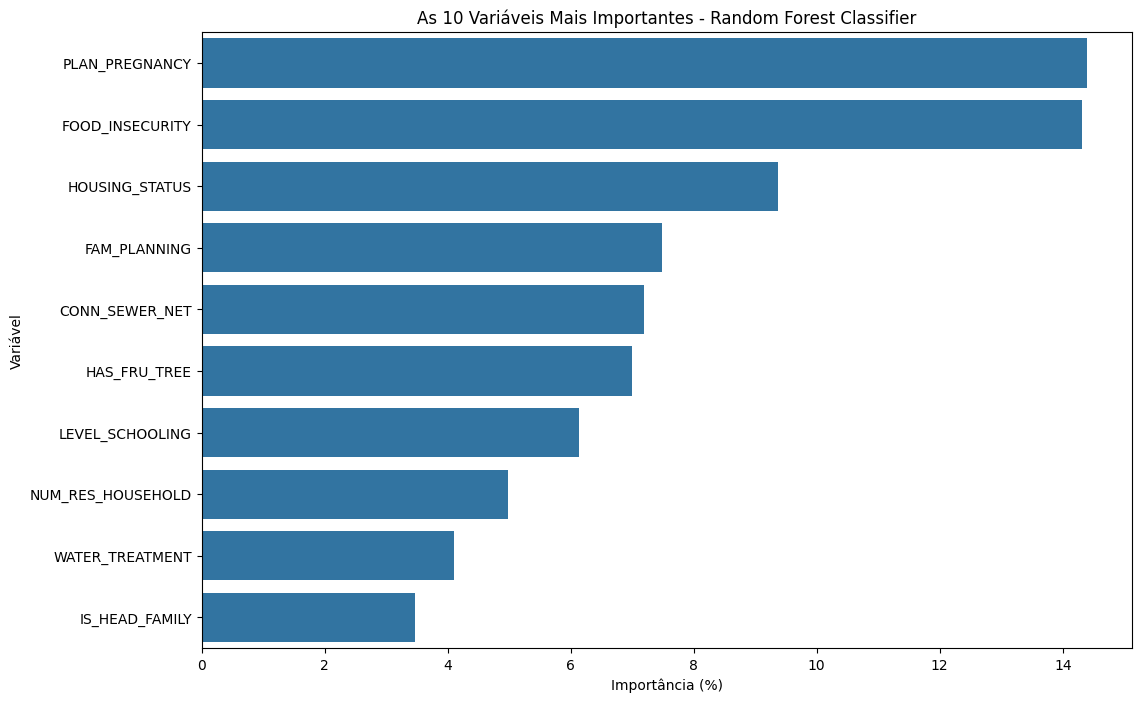

In [23]:
# Importância das variáveis no modelo Random Forest Classifier
importances_rf = random_forest.feature_importances_
features = X.columns

# Criando um DataFrame com as variáveis e suas importâncias
feature_importance_df = pd.DataFrame({
    "Variável": features,
    "Importância": importances_rf
})

# Calculando a porcentagem de importância
feature_importance_df["Importância (%)"] = 100 * (feature_importance_df["Importância"] / feature_importance_df["Importância"].sum())

# Ordenando as variáveis por importância
feature_importance_df = feature_importance_df.sort_values(by="Importância", ascending=False)

# Exibindo as 10 variáveis mais importantes
print("Variáveis mais importantes para a predição de sífilis congênita (Random Forest Classifier):")
display(feature_importance_df.head(10))

# Visualizando as features mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(x="Importância (%)", y="Variável", data=feature_importance_df.head(10))
plt.title("As 10 Variáveis Mais Importantes - Random Forest Classifier")
plt.xlabel("Importância (%)")
plt.ylabel("Variável")
plt.show()


## 8. Análise de Fatores e Discussão sobre Prevenção

### 8.1. Identificação de Fatores Relevantes

Com base nos modelos, identificamos as variáveis que mais contribuem para os desfechos.


Variáveis mais importantes para a predição de sífilis congênita:


,Variável,Importância,Importância (%)
3,PLAN_PREGNANCY,0.143979,14.397921
9,FOOD_INSECURITY,0.143129,14.312882
22,HOUSING_STATUS,0.093692,9.369242
13,FAM_PLANNING,0.074798,7.479835
17,CONN_SEWER_NET,0.071849,7.184939
19,HAS_FRU_TREE,0.069903,6.990347
16,LEVEL_SCHOOLING,0.061424,6.142429
18,NUM_RES_HOUSEHOLD,0.049762,4.976181
23,WATER_TREATMENT,0.041095,4.109479
7,IS_HEAD_FAMILY,0.034715,3.471510


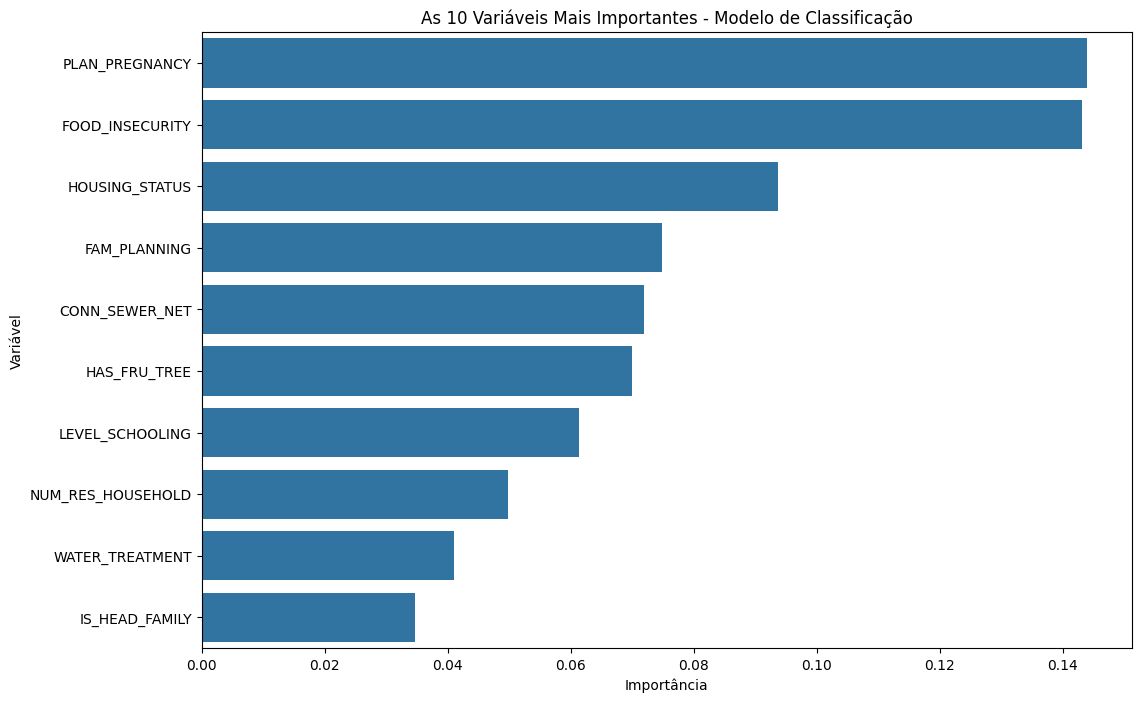

In [24]:
# Ordenando as variáveis por importância no modelo Random Forest Classifier
feature_importance_df = feature_importance_df.sort_values(by="Importância", ascending=False)

# Exibindo as 10 variáveis mais importantes
print("Variáveis mais importantes para a predição de sífilis congênita:")
display(feature_importance_df.head(10))

# Visualizando as variáveis mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(x="Importância", y="Variável", data=feature_importance_df.head(10))
plt.title("As 10 Variáveis Mais Importantes - Modelo de Classificação")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()

### 8.2. Discussão sobre Políticas de Saúde Pública

### Introdução à Discussão de Políticas Públicas

A análise da sífilis congênita ressalta a importância de políticas públicas bem planejadas para a promoção da saúde materna e infantil. A implementação de iniciativas eficazes, tanto no âmbito nacional quanto internacional, é fundamental para a redução de doenças transmissíveis e para o fortalecimento da atenção primária à saúde. As políticas mencionadas a seguir demonstram como a articulação entre planejamento familiar, educação em saúde, combate a fatores de risco e ampliação do acesso aos serviços de saúde pode contribuir significativamente para a prevenção e o controle da sífilis congênita.

### Discussão sobre Políticas de Saúde Pública

1. **Ampliação do Acesso aos Serviços de Saúde**  
   - O programa **Previne Brasil**, implementado durante o governo de **Jair Messias Bolsonaro**, reformulou o financiamento da atenção primária à saúde no Brasil, priorizando o acesso e a qualidade dos serviços básicos, incluindo o pré-natal. Essa iniciativa destaca a importância de um sistema de saúde robusto para a prevenção de doenças como a sífilis congênita.  
     - **Link**: [Programa Previne Brasil - Ministério da Saúde](https://www.gov.br/saude/pt-br/composicao/saps/previne-brasil)

2. **Referência Internacional - Estados Unidos**  
   - Durante a administração de **Donald Trump**, o plano **Ending the HIV Epidemic** destacou estratégias para reduzir doenças sexualmente transmissíveis, incluindo a ampliação de diagnósticos e tratamentos, que podem ser adaptadas para outras condições, como a sífilis congênita.  
     - **Link**: [Ending the HIV Epidemic - Departamento de Saúde e Serviços Humanos dos EUA](https://www.hiv.gov/federal-response/ending-the-hiv-epidemic/overview)

3. **Referência Internacional - El Salvador**  
   - Sob a liderança de **Nayib Bukele**, El Salvador realizou reformas no sistema de saúde para ampliar o acesso à atenção básica e medicamentos. Essas iniciativas podem servir de inspiração para países que enfrentam desafios semelhantes na prevenção de doenças materno-infantis.  
     - **Link**: [Iniciativas em Saúde de Nayib Bukele - Presidência de El Salvador](https://www.presidencia.gob.sv/category/salud/)

---

### Conclusão

A implementação de políticas públicas eficazes depende de um planejamento estratégico que contemple aspectos como fortalecimento da atenção primária, combate a fatores de risco e educação em saúde. As iniciativas analisadas neste relatório destacam a importância de esforços conjuntos para melhorar os indicadores de saúde materna e prevenir condições evitáveis, como a sífilis congênita.